本文是对pandas官网上《10 Minutes to pandas》的一个简单的翻译，原文在[这里](http://pandas.pydata.org/pandas-docs/stable/10min.html)。这篇文章是对pandas的一个简单的介绍，详细的介绍请参考：[Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)。习惯上，我们会按下面格式引入所需要的包：

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# 一、创建对象

可以通过[Data Structure Intro Section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)来查看有关该节内容的详细信息。

1. 可以通过传递一个list对象来创建一个Series，pandas会默认创建整型索引：

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

2.通过传递一个numpy array，时间索引以及列标签来创建一个DataFrame：

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


3.通过传递一个能够被转换成类似序列结构的字典对象来创建一个DataFrame：

In [10]:
df2 = pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1, index=list(range(4)),dtype='float32'),
                    'D':np.array([3] * 4, dtype='int32'),
                    'E':pd.Categorical(['test','train', 'test','train']),
                    'F':'foo'
                   })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


4.查看不同列的数据类型：

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

5.使用Tab自动补全功能会自动识别所有的属性以及自定义的列

# 二、查看数据

详情请参阅：[Basics Section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

1.查看Frame中头部和尾部的行：

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


2.显示索引、列和底层的numpy数据：

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.86926292,  1.42921423,  0.40990827,  0.98227341],
       [ 0.46847506,  0.17974843, -0.36351836,  0.37527387],
       [-1.64568293,  0.31794515, -0.01963902, -0.68142812],
       [ 0.19015326, -2.09066085,  0.38548267,  0.93442217],
       [-0.13965613, -0.33228349,  0.78567179,  0.52749525],
       [ 0.26387096,  0.69346647,  1.18661059,  0.05286783]])

3.describe()函数对于数据的快速统计汇总：

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.288684,0.032905,0.397419,0.365151
std,0.813464,1.194297,0.552598,0.620357
min,-1.645683,-2.090661,-0.363518,-0.681428
25%,-0.686861,-0.204276,0.081641,0.133469
50%,0.025249,0.248847,0.397695,0.451385
75%,0.245442,0.599586,0.691731,0.832690
max,0.468475,1.429214,1.186611,0.982273


4.对数据的转置(tranverse):

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.869263,0.468475,-1.645683,0.190153,-0.139656,0.263871
B,1.429214,0.179748,0.317945,-2.090661,-0.332283,0.693466
C,0.409908,-0.363518,-0.019639,0.385483,0.785672,1.186611
D,0.982273,0.375274,-0.681428,0.934422,0.527495,0.052868


5.按轴进行排序

In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,0.982273,0.409908,1.429214,-0.869263
2013-01-02,0.375274,-0.363518,0.179748,0.468475
2013-01-03,-0.681428,-0.019639,0.317945,-1.645683
2013-01-04,0.934422,0.385483,-2.090661,0.190153
2013-01-05,0.527495,0.785672,-0.332283,-0.139656
2013-01-06,0.052868,1.186611,0.693466,0.263871


6.按值进行排序

In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-06,0.263871,0.693466,1.186611,0.052868
2013-01-01,-0.869263,1.429214,0.409908,0.982273


# 三、选择

虽然标准的Python/Numpy的选择和设置表达式都能够直接派上用场，但是作为工程使用的代码，我们推荐使用经过优化的pandas数据访问方式：.at,.iat,
.loc,.iloc和.ix详情请参阅[Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)
                                                 和[MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## 获取

1.选择一个单独的列，这将会返回一个Series，等同于df.A:

In [22]:
df

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


In [23]:
df['A']

2013-01-01   -0.869263
2013-01-02    0.468475
2013-01-03   -1.645683
2013-01-04    0.190153
2013-01-05   -0.139656
2013-01-06    0.263871
Freq: D, Name: A, dtype: float64

2.通过[]进行选择，这将会对行进行切片

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428


In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422


## 通过标签选择

1.使用标签来获取一个交叉的区域

In [26]:
df

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


In [27]:
df.loc[dates[0]]

A   -0.869263
B    1.429214
C    0.409908
D    0.982273
Name: 2013-01-01 00:00:00, dtype: float64

2.通过标签来在多个轴上进行选择

In [28]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-0.869263,1.429214
2013-01-02,0.468475,0.179748
2013-01-03,-1.645683,0.317945
2013-01-04,0.190153,-2.090661
2013-01-05,-0.139656,-0.332283
2013-01-06,0.263871,0.693466


3.标签切片

In [29]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.468475,0.179748
2013-01-03,-1.645683,0.317945
2013-01-04,0.190153,-2.090661


4.对于返回的对象进行维度缩减

In [30]:
df.loc['20130102', ['A','B']]

A    0.468475
B    0.179748
Name: 2013-01-02 00:00:00, dtype: float64

5.获取一个标量

In [31]:
df.loc[dates[0], 'A']

-0.8692629237107602

6.快速访问一个标量（与上一个方法等价）

In [32]:
df.at[dates[0], 'A']

-0.8692629237107602

## 通过位置选择

1.通过传递数值进行位置选择（选择的是行）

In [33]:
df

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


In [34]:
df.iloc[3]

A    0.190153
B   -2.090661
C    0.385483
D    0.934422
Name: 2013-01-04 00:00:00, dtype: float64

2.通过数值进行切片，与numpy/python中的情况类似

In [35]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.190153,-2.090661
2013-01-05,-0.139656,-0.332283


3.通过指定一个位置的列表，与numpy/python中的情况类似

In [36]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.468475,-0.363518
2013-01-03,-1.645683,-0.019639
2013-01-05,-0.139656,0.785672


4.对行进行切片

In [37]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428


5.对列进行切片

In [38]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.429214,0.409908
2013-01-02,0.179748,-0.363518
2013-01-03,0.317945,-0.019639
2013-01-04,-2.090661,0.385483
2013-01-05,-0.332283,0.785672
2013-01-06,0.693466,1.186611


6.获取特定的值

In [39]:
df.iloc[1,1]

0.1797484255157688

In [40]:
df.iat[1,1]

0.1797484255157688

## 布尔索引

In [41]:
df

,A,B,C,D
2013-01-01,-0.869263,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-05,-0.139656,-0.332283,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


1.使用一个单独列的值来选择数据：

In [42]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.468475,0.179748,-0.363518,0.375274
2013-01-04,0.190153,-2.090661,0.385483,0.934422
2013-01-06,0.263871,0.693466,1.186611,0.052868


2.使用where操作来选择数据：

In [43]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.429214,0.409908,0.982273
2013-01-02,0.468475,0.179748,NaN,0.375274
2013-01-03,NaN,0.317945,NaN,NaN
2013-01-04,0.190153,NaN,0.385483,0.934422
2013-01-05,NaN,NaN,0.785672,0.527495
2013-01-06,0.263871,0.693466,1.186611,0.052868


3.使用isin()方法来过滤：

In [44]:
df2 = df.copy()

In [45]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [46]:
df2

,A,B,C,D,E
2013-01-01,-0.869263,1.429214,0.409908,0.982273,one
2013-01-02,0.468475,0.179748,-0.363518,0.375274,one
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428,two
2013-01-04,0.190153,-2.090661,0.385483,0.934422,three
2013-01-05,-0.139656,-0.332283,0.785672,0.527495,four
2013-01-06,0.263871,0.693466,1.186611,0.052868,three


In [47]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428,two
2013-01-05,-0.139656,-0.332283,0.785672,0.527495,four


## 设置

1.设置一个新的列：

In [48]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [49]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [50]:
df['F'] = s1

In [51]:
df

,A,B,C,D,F
2013-01-01,-0.869263,1.429214,0.409908,0.982273,NaN
2013-01-02,0.468475,0.179748,-0.363518,0.375274,1.0
2013-01-03,-1.645683,0.317945,-0.019639,-0.681428,2.0
2013-01-04,0.190153,-2.090661,0.385483,0.934422,3.0
2013-01-05,-0.139656,-0.332283,0.785672,0.527495,4.0
2013-01-06,0.263871,0.693466,1.186611,0.052868,5.0


2.通过标签设置新的值：

In [52]:
df.at[dates[0],'A'] = 0

3.通过位置设置新的值：

In [53]:
df.iat[0,1] = 0

4.通过一个numpy数值设置一组新值：

In [54]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述操作结果如下：

In [55]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.409908,5,NaN
2013-01-02,0.468475,0.179748,-0.363518,5,1.0
2013-01-03,-1.645683,0.317945,-0.019639,5,2.0
2013-01-04,0.190153,-2.090661,0.385483,5,3.0
2013-01-05,-0.139656,-0.332283,0.785672,5,4.0
2013-01-06,0.263871,0.693466,1.186611,5,5.0


5.通过where操作来设置新的值

In [56]:
df2 = df.copy()

In [57]:
df2[df2 > 0] = -df2

In [58]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.409908,-5,NaN
2013-01-02,-0.468475,-0.179748,-0.363518,-5,-1.0
2013-01-03,-1.645683,-0.317945,-0.019639,-5,-2.0
2013-01-04,-0.190153,-2.090661,-0.385483,-5,-3.0
2013-01-05,-0.139656,-0.332283,-0.785672,-5,-4.0
2013-01-06,-0.263871,-0.693466,-1.186611,-5,-5.0


# 四、缺失值处理

在pandas中，使用np.nan来代替缺失值，这些值将默认不会包含在计算中，详情请参阅：[Missing Data Section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

In [59]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.409908,5,NaN
2013-01-02,0.468475,0.179748,-0.363518,5,1.0
2013-01-03,-1.645683,0.317945,-0.019639,5,2.0
2013-01-04,0.190153,-2.090661,0.385483,5,3.0
2013-01-05,-0.139656,-0.332283,0.785672,5,4.0
2013-01-06,0.263871,0.693466,1.186611,5,5.0


1.reindex()方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝：

In [60]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [61]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [62]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.409908,5,NaN,1.0
2013-01-02,0.468475,0.179748,-0.363518,5,1.0,1.0
2013-01-03,-1.645683,0.317945,-0.019639,5,2.0,NaN
2013-01-04,0.190153,-2.090661,0.385483,5,3.0,NaN


2.去掉包含缺失值的行：

In [63]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.468475,0.179748,-0.363518,5,1.0,1.0


3.对缺失值进行填充：

In [64]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.409908,5,5.0,1.0
2013-01-02,0.468475,0.179748,-0.363518,5,1.0,1.0
2013-01-03,-1.645683,0.317945,-0.019639,5,2.0,5.0
2013-01-04,0.190153,-2.090661,0.385483,5,3.0,5.0


4.对数据进行布尔填充：

In [65]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 五、相关操作

详情请参与[Basic Section On Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### 统计（相关操作通常情况下不包括缺失值）

In [66]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.409908,5,NaN
2013-01-02,0.468475,0.179748,-0.363518,5,1.0
2013-01-03,-1.645683,0.317945,-0.019639,5,2.0
2013-01-04,0.190153,-2.090661,0.385483,5,3.0
2013-01-05,-0.139656,-0.332283,0.785672,5,4.0
2013-01-06,0.263871,0.693466,1.186611,5,5.0


1.执行描述性统计：

In [67]:
df.mean()

A   -0.143807
B   -0.205297
C    0.397419
D    5.000000
F    3.000000
dtype: float64

2.在其他轴上进行相同的操作：

In [68]:
df.mean(1)

2013-01-01    1.352477
2013-01-02    1.256941
2013-01-03    1.130525
2013-01-04    1.296995
2013-01-05    1.862746
2013-01-06    2.428790
Freq: D, dtype: float64

3.对于拥有不同维度，需要对齐的对象进行操作，pandas会自动的沿着指定的维度进行广播

In [69]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [70]:
s = pd.Series([1,3,4,np.nan,6,8], index=dates).shift(2)

In [71]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    NaN
Freq: D, dtype: float64

### Apply

1.对数据应用函数：

In [72]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.409908,5,NaN
2013-01-02,0.468475,0.179748,-0.363518,5,1.0
2013-01-03,-1.645683,0.317945,-0.019639,5,2.0
2013-01-04,0.190153,-2.090661,0.385483,5,3.0
2013-01-05,-0.139656,-0.332283,0.785672,5,4.0
2013-01-06,0.263871,0.693466,1.186611,5,5.0


In [73]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.409908,5,NaN
2013-01-02,0.468475,0.179748,0.046390,10,1.0
2013-01-03,-1.177208,0.497694,0.026751,15,3.0
2013-01-04,-0.987055,-1.592967,0.412234,20,6.0
2013-01-05,-1.126711,-1.925251,1.197905,25,10.0
2013-01-06,-0.862840,-1.231784,2.384516,30,15.0


In [74]:
df.apply(lambda x: x.max() - x.min())

A    2.114158
B    2.784127
C    1.550129
D    0.000000
F    4.000000
dtype: float64

### 直方图

具体请参照: [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [76]:
s

0    0
1    4
2    4
3    6
4    3
5    6
6    2
7    0
8    5
9    2
dtype: int64

In [77]:
s.value_counts()

6    2
4    2
2    2
0    2
5    1
3    1
dtype: int64

### 字符串方法

Series对象在其str属性中配备了一组字符串处理方法，可以很容易的应用到数组中的每个元素，如下段代码所示。
更多详情请参考：[Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods)

In [78]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [79]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 六、合并

pandas提供了大量的方法能够轻松的对Series、DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。具体请参阅：[Merging Section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

### Concat

In [80]:
df = pd.DataFrame(np.random.randn(10, 4))

In [81]:
df

,0,1,2,3
0,0.932848,0.375978,-1.277465,0.837300
1,-0.719886,0.458031,-0.692764,0.390613
2,-0.725570,-0.400464,-1.472693,-0.332326
3,-0.359022,-0.772389,-0.467086,0.288147
4,0.336282,0.837922,0.161032,1.287263
5,1.496873,-1.802398,1.027992,0.032165
6,1.091014,-1.723174,1.664548,-2.516989
7,1.025504,-1.767432,-0.868274,-0.018641
8,-0.244249,0.127395,-0.552145,-0.263031
9,-0.187864,-0.964271,0.112054,-0.570242


In [82]:
pieces = [df[:3], df[3:7], df[7:]]

In [83]:
# break it into pieces
pieces

[          0         1         2         3
 0  0.932848  0.375978 -1.277465  0.837300
 1 -0.719886  0.458031 -0.692764  0.390613
 2 -0.725570 -0.400464 -1.472693 -0.332326,
           0         1         2         3
 3 -0.359022 -0.772389 -0.467086  0.288147
 4  0.336282  0.837922  0.161032  1.287263
 5  1.496873 -1.802398  1.027992  0.032165
 6  1.091014 -1.723174  1.664548 -2.516989,
           0         1         2         3
 7  1.025504 -1.767432 -0.868274 -0.018641
 8 -0.244249  0.127395 -0.552145 -0.263031
 9 -0.187864 -0.964271  0.112054 -0.570242]

In [84]:
type(pieces)

list

In [85]:
pd.concat(pieces)

,0,1,2,3
0,0.932848,0.375978,-1.277465,0.837300
1,-0.719886,0.458031,-0.692764,0.390613
2,-0.725570,-0.400464,-1.472693,-0.332326
3,-0.359022,-0.772389,-0.467086,0.288147
4,0.336282,0.837922,0.161032,1.287263
5,1.496873,-1.802398,1.027992,0.032165
6,1.091014,-1.723174,1.664548,-2.516989
7,1.025504,-1.767432,-0.868274,-0.018641
8,-0.244249,0.127395,-0.552145,-0.263031
9,-0.187864,-0.964271,0.112054,-0.570242


### Join类似于SQL类型的合并，具体请参阅：[Database Style Joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [86]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})

In [87]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [88]:
left

,key,lval
0,foo,1
1,foo,2


In [89]:
right

,key,rval
0,foo,4
1,foo,5


In [90]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append将一行连接到一个DataFrame上，具体请参阅[Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [91]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [92]:
df

,A,B,C,D
0,-0.177432,1.765606,0.312422,1.054359
1,0.492412,-0.591578,-0.346898,-0.337962
2,-0.688289,0.863367,0.513840,1.437936
3,2.063826,0.281572,0.824427,0.172079
4,2.276008,0.561699,1.467637,-0.427735
5,-1.864305,0.789540,-1.569404,-0.156438
6,-0.090729,1.061976,0.707693,-0.127045
7,-0.970123,-1.565105,-0.808099,-1.059730


In [93]:
s = df.iloc[3]

In [94]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.177432,1.765606,0.312422,1.054359
1,0.492412,-0.591578,-0.346898,-0.337962
2,-0.688289,0.863367,0.513840,1.437936
3,2.063826,0.281572,0.824427,0.172079
4,2.276008,0.561699,1.467637,-0.427735
5,-1.864305,0.789540,-1.569404,-0.156438
6,-0.090729,1.061976,0.707693,-0.127045
7,-0.970123,-1.565105,-0.808099,-1.059730
8,2.063826,0.281572,0.824427,0.172079


# 七、分组

对于“group by”操作，我们通常是指以下一个或多个操作步骤：
+ （Splitting）按照一些规则将数据分为不同的组
+ （Applying）对于每组数据分别执行一个函数
+ （Combining）将结果组合刀一个数据结构中
详情请参阅：[Grouping Section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [95]:
df = pd.DataFrame({
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    })

In [96]:
df

,A,B,C,D
0,foo,one,0.332312,-0.763369
1,bar,one,0.247554,-0.148958
2,foo,two,-0.050901,-0.697065
3,bar,three,-0.686377,-0.446040
4,foo,two,1.353452,0.512818
5,bar,two,1.662582,0.298931
6,foo,one,0.574473,1.922786
7,foo,three,0.166138,-1.787364


1.分组并对每个分组执行sum函数：

In [97]:
df.groupby('A').sum()

,C,D
A,,
bar,1.223758,-0.296067
foo,2.375474,-0.812196


2.通过多个列进行分组形成一个层次索引，然后执行函数：

In [98]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.247554 -0.148958
    three -0.686377 -0.446040
    two    1.662582  0.298931
foo one    0.906785  1.159416
    three  0.166138 -1.787364
    two    1.302551 -0.184248

# 八、Reshaping

详情请参阅[Hierachical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical)和[Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

### Stack

In [99]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [100]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [101]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [102]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [103]:
df2 = df[:4]

In [104]:
df2

A         B
first second                    
bar   one    -2.409104 -0.813450
      two     0.706214  0.705448
baz   one    -0.208968  0.080837
      two     1.811128 -0.814867

In [105]:
stacked = df2.stack()

In [106]:
stacked

first  second   
bar    one     A   -2.409104
               B   -0.813450
       two     A    0.706214
               B    0.705448
baz    one     A   -0.208968
               B    0.080837
       two     A    1.811128
               B   -0.814867
dtype: float64

In [107]:
type(stacked)

pandas.core.series.Series

In [108]:
stacked.unstack()

A         B
first second                    
bar   one    -2.409104 -0.813450
      two     0.706214  0.705448
baz   one    -0.208968  0.080837
      two     1.811128 -0.814867

In [109]:
stacked.unstack(1)

second        one       two
first                      
bar   A -2.409104  0.706214
      B -0.813450  0.705448
baz   A -0.208968  1.811128
      B  0.080837 -0.814867

In [110]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -2.409104 -0.208968
       B -0.813450  0.080837
two    A  0.706214  1.811128
       B  0.705448 -0.814867

### 数据透视表，详情请参阅：[Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot)

In [111]:
df = pd.DataFrame({
        'A': ['one', 'one', 'two', 'three'] * 3,
        'B': ['A', 'B', 'C'] * 4,
        'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D': np.random.randn(12),
        'E': np.random.randn(12)
    })

In [112]:
df

,A,B,C,D,E
0,one,A,foo,0.510025,-1.716434
1,one,B,foo,-0.129129,0.177228
2,two,C,foo,-0.418916,1.300821
3,three,A,bar,0.773404,-1.637978
4,one,B,bar,-0.783832,1.314831
5,one,C,bar,-0.025104,-0.309552
6,two,A,foo,0.299680,-1.272803
7,three,B,foo,-0.961877,0.830709
8,one,C,foo,2.740911,0.913389
9,one,A,bar,-1.000691,0.031731


可以从这个数据中轻松的生成数据透视表：

In [113]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.000691  0.510025
      B -0.783832 -0.129129
      C -0.025104  2.740911
three A  0.773404       NaN
      B       NaN -0.961877
      C  0.743249       NaN
two   A       NaN  0.299680
      B -1.282597       NaN
      C       NaN -0.418916

# 九、时间序列

pandas在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）。这种操作在金融领域非常常见。具体参考：[Time Series Section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [114]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [115]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [116]:
new_ts = ts.resample('5Min', how='sum')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [117]:
new_ts

2012-01-01    24340
Freq: 5T, dtype: int64

1.时区表示：

In [118]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [119]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [120]:
ts

2012-03-06    1.451418
2012-03-07    0.237722
2012-03-08   -1.026769
2012-03-09   -0.212991
2012-03-10    0.284986
Freq: D, dtype: float64

In [121]:
ts_utc = ts.tz_localize('UTC')

In [122]:
ts_utc

2012-03-06 00:00:00+00:00    1.451418
2012-03-07 00:00:00+00:00    0.237722
2012-03-08 00:00:00+00:00   -1.026769
2012-03-09 00:00:00+00:00   -0.212991
2012-03-10 00:00:00+00:00    0.284986
Freq: D, dtype: float64

2.时区转换：

In [123]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.451418
2012-03-06 19:00:00-05:00    0.237722
2012-03-07 19:00:00-05:00   -1.026769
2012-03-08 19:00:00-05:00   -0.212991
2012-03-09 19:00:00-05:00    0.284986
Freq: D, dtype: float64

3.时区跨度转换

In [124]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [125]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [126]:
ts

2012-01-31   -0.892918
2012-02-29    1.921259
2012-03-31    0.641119
2012-04-30   -0.396245
2012-05-31   -0.854898
Freq: M, dtype: float64

In [127]:
ps = ts.to_period()

In [128]:
ps

2012-01   -0.892918
2012-02    1.921259
2012-03    0.641119
2012-04   -0.396245
2012-05   -0.854898
Freq: M, dtype: float64

In [129]:
ps.to_timestamp()

2012-01-01   -0.892918
2012-02-01    1.921259
2012-03-01    0.641119
2012-04-01   -0.396245
2012-05-01   -0.854898
Freq: MS, dtype: float64

4.时期和时间戳之间的转换使得可以使用一些方便的算术函数。

In [130]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [131]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [132]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [133]:
ts.head()

1990-03-01 09:00    0.401374
1990-06-01 09:00   -0.097918
1990-09-01 09:00    0.455425
1990-12-01 09:00   -1.357150
1991-03-01 09:00   -1.242409
Freq: H, dtype: float64

# 十、Categorical

从0.15版本开始，pandas可以在DataFrame中支持Categorical类型的数据，详细介绍参考：[categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and [API Documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)

In [134]:
df = pd.DataFrame({
        'id':[1,2,3,4,5,6],
        'raw_grade':['a','b','b','a','a','e']
    })

1.将原始的grade转换为Categorical数据类型：

In [135]:
df['grade'] = df['raw_grade'].astype('category', ordered=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [136]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a < b < e]

2.将Categorical类型数据重命名为更有意义的名称：

In [137]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

3.对类别进行重新排序，增加缺失的类别：

In [138]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

In [139]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad < bad < medium < good < very good]

4.排序是按照Categorical的顺序进行的而不是按照字典顺序进行：

In [140]:
df.sort_values('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


5.对Categorical列进行排序时存在空的类别：

In [141]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 十一、画图

具体文档参考：[Plotting Docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

In [142]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [143]:
ts = ts.cumsum()

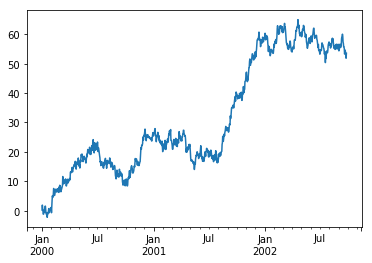

In [144]:
ts.plot()

对于DataFrame来说，plot是一种将所有列及其标签进行绘制的简便方法：

In [145]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [146]:
df = df.cumsum()

In [147]:
df

,A,B,C,D
2000-01-01,-1.762159,1.052165,0.229512,-0.683497
2000-01-02,-1.460392,0.631337,-0.261825,-1.513505
2000-01-03,-0.904992,0.765362,-0.110764,2.417273
2000-01-04,-1.401850,-0.117851,1.247936,1.834472
2000-01-05,-2.275967,0.574582,2.677830,0.939863
2000-01-06,-2.297318,-0.413412,2.232597,1.083908
2000-01-07,-2.073349,0.122879,3.552990,0.892394
2000-01-08,-0.480170,-1.657018,4.711126,3.221883
2000-01-09,-0.474515,-3.743369,6.175822,3.101904
2000-01-10,-0.132852,-2.708780,6.347052,2.965325


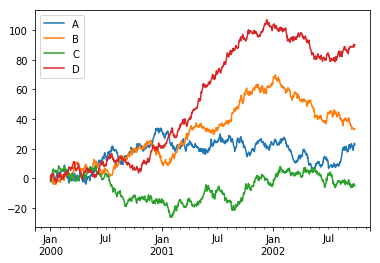

In [159]:
plt.figure;df.plot();plt.legend(loc='best');

# 导入和保存数据

### CSV，参考：[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

1.写入csv文件

In [149]:
df.to_csv('foo.csv')

2.从csv文件中读取：

In [150]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.762159,1.052165,0.229512,-0.683497
1,2000-01-02,-1.460392,0.631337,-0.261825,-1.513505
2,2000-01-03,-0.904992,0.765362,-0.110764,2.417273
3,2000-01-04,-1.401850,-0.117851,1.247936,1.834472
4,2000-01-05,-2.275967,0.574582,2.677830,0.939863
5,2000-01-06,-2.297318,-0.413412,2.232597,1.083908
6,2000-01-07,-2.073349,0.122879,3.552990,0.892394
7,2000-01-08,-0.480170,-1.657018,4.711126,3.221883
8,2000-01-09,-0.474515,-3.743369,6.175822,3.101904
9,2000-01-10,-0.132852,-2.708780,6.347052,2.965325


### HDF5，参考：[HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

1.写入HDF5存储

In [151]:
df.to_hdf('foo.h5', 'df')

2.从HDF5存储中读取：

In [152]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-1.762159,1.052165,0.229512,-0.683497
2000-01-02,-1.460392,0.631337,-0.261825,-1.513505
2000-01-03,-0.904992,0.765362,-0.110764,2.417273
2000-01-04,-1.401850,-0.117851,1.247936,1.834472
2000-01-05,-2.275967,0.574582,2.677830,0.939863
2000-01-06,-2.297318,-0.413412,2.232597,1.083908
2000-01-07,-2.073349,0.122879,3.552990,0.892394
2000-01-08,-0.480170,-1.657018,4.711126,3.221883
2000-01-09,-0.474515,-3.743369,6.175822,3.101904
2000-01-10,-0.132852,-2.708780,6.347052,2.965325
